In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os

import warnings
warnings.filterwarnings('ignore')

# Ensure figures directory exists
os.makedirs('../docs/figures', exist_ok=True)

In [2]:
df = pd.read_csv('../data/processed/final_cleaned_data.csv')
df

,pin,year,township_code,nbhd,class,sale_date,is_mydec_date,sale_price,doc_no,deed_type,...,sale_filter_same_sale_within_365,sale_filter_less_than_10k,sale_filter_deed_type,row_id,pin10,lon,lat,nearest_cta_stop,nearest_cta_lines,min_distance_meters
0,15014170030000,2020.0,33,33050,206,2020-10-15,False,521000.0,2.032410e+09,Other,...,False,False,False,7102094,1501417003,-87.808066,41.895514,95th/Dan Ryan,Red Line,1105.571660
1,10131160410000,2020.0,17,17060,203,2020-12-21,False,320000.0,2.102917e+09,Other,...,False,False,False,7122185,1013116041,-87.702749,42.051429,Harlem-Congress,Blue Line (Congress),2153.510283
2,24043110100000,2022.0,39,39050,202,2022-07-15,True,215000.0,2.221512e+09,Trustee,...,False,False,False,7402023,2404311010,-87.756464,41.724532,95th/Dan Ryan,Red Line,7197.935429
3,31341070040000,2020.0,32,32180,207,2020-04-24,False,85000.0,2.032112e+09,Warranty,...,False,False,False,7101979,3134107004,-87.729815,41.481908,95th/Dan Ryan,Red Line,29172.501832
4,13162000260000,2018.0,71,71101,203,2018-06-16,True,332000.0,1.819310e+09,Warranty,...,False,False,False,96111207,1316200026,-87.756617,41.966668,Garfield-Dan Ryan,Red Line,647.941557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123812,30321010120000,2025.0,37,37181,203,2025-09-07,True,200000.0,2.526620e+09,Warranty,...,False,False,False,7771166,3032101012,-87.537789,41.571360,NaN,NaN,19344.132843
123813,12274110670000,2025.0,20,20081,202,2025-08-13,True,303000.0,2.527221e+09,Warranty,...,False,False,False,7771878,1227411067,-87.851190,41.925953,NaN,NaN,6459.472050
123814,12281130640000,2025.0,20,20030,203,2025-08-25,True,360000.0,2.526520e+09,Trustee,...,False,False,False,7771018,1228113064,-87.878433,41.934339,NaN,NaN,5590.861336
123815,13224170200000,2025.0,71,71070,203,2025-01-20,True,399900.0,2.502922e+09,Warranty,...,False,False,False,7699788,1322417020,-87.729893,41.943715,NaN,NaN,1028.068819


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123817 entries, 0 to 123816
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   pin                               123817 non-null  int64  
 1   year                              123817 non-null  float64
 2   township_code                     123817 non-null  int64  
 3   nbhd                              123817 non-null  int64  
 4   class                             123817 non-null  int64  
 5   sale_date                         123817 non-null  object 
 6   is_mydec_date                     123817 non-null  bool   
 7   sale_price                        123817 non-null  float64
 8   doc_no                            123817 non-null  float64
 9   deed_type                         123816 non-null  object 
 10  mydec_deed_type                   122854 non-null  object 
 11  seller_name                       123612 non-null  o

##### Research Question
1. Is there a statistically significant correlation between the Euclidean distance of a residential property from the nearest active CTA rail station and its adjusted sale price per square foot?

`min_distance_meters`, `sale_price`

In [4]:
df[['min_distance_meters', 'sale_price']].corr()

,min_distance_meters,sale_price
min_distance_meters,1.00000,-0.22497
sale_price,-0.22497,1.00000


- With `min_distance_meters` increases by 1 unit, `sale_price` will decrease for 0.22 unit. 
- Weak relationship

2. How does the transit line color (e.g., Red Line vs. Brown Line) influence the magnitude of this correlation?

`nearest_cta_lines`, `sale_price`

In [5]:
df_lines = df[['min_distance_meters','nearest_cta_lines', 'sale_price']]
df_lines.head()

,min_distance_meters,nearest_cta_lines,sale_price
0,1105.571660,Red Line,521000.0
1,2153.510283,Blue Line (Congress),320000.0
2,7197.935429,Red Line,215000.0
3,29172.501832,Red Line,85000.0
4,647.941557,Red Line,332000.0


In [6]:
df_lines['nearest_cta_lines'] = df_lines['nearest_cta_lines'].astype('string')
df_lines['nearest_cta_lines'] = df_lines['nearest_cta_lines'].fillna('nan')
df_lines['nearest_cta_lines'] = df_lines['nearest_cta_lines'].apply(lambda x: x.lower())
df_lines['nearest_cta_lines'].unique()

array(['red line', 'blue line (congress)', 'pink line',
       'green line (lake)', 'brown, orange, pink, purple (express)',
       'green line (englewood)', "blue line (o'hare)", 'orange line',
       'nan'], dtype=object)

In [7]:
df_lines['contains_red'] = df_lines['nearest_cta_lines'].str.contains('red', case=False, na=False)
df_lines['contains_green'] = df_lines['nearest_cta_lines'].str.contains('green', case=False, na=False)
df_lines['contains_blue'] = df_lines['nearest_cta_lines'].str.contains('blue', case=False, na=False)
df_lines['contains_brown'] = df_lines['nearest_cta_lines'].str.contains('brown', case=False, na=False)
df_lines['contains_yellow'] = df_lines['nearest_cta_lines'].str.contains('yellow', case=False, na=False)
df_lines['contains_orange'] = df_lines['nearest_cta_lines'].str.contains('orange', case=False, na=False)
df_lines['contains_purple'] = df_lines['nearest_cta_lines'].str.contains('purple', case=False, na=False)
df_lines['contains_pink'] = df_lines['nearest_cta_lines'].str.contains('pink', case=False, na=False)
df_lines['contains_evanston'] = df_lines['nearest_cta_lines'].str.contains('evanston', case=False, na=False)
df_lines.head()

,min_distance_meters,nearest_cta_lines,sale_price,contains_red,contains_green,contains_blue,contains_brown,contains_yellow,contains_orange,contains_purple,contains_pink,contains_evanston
0,1105.571660,red line,521000.0,True,False,False,False,False,False,False,False,False
1,2153.510283,blue line (congress),320000.0,False,False,True,False,False,False,False,False,False
2,7197.935429,red line,215000.0,True,False,False,False,False,False,False,False,False
3,29172.501832,red line,85000.0,True,False,False,False,False,False,False,False,False
4,647.941557,red line,332000.0,True,False,False,False,False,False,False,False,False


In [8]:
df_lines['line_num'] = df_lines['nearest_cta_lines'].str.count(',')
df_lines['line_num'] = df_lines['line_num'] + 1
df_lines.loc[df_lines['nearest_cta_lines'] == 'orange & green lines', 'line_num'] = 2
df_lines.loc[df_lines['nearest_cta_lines'] == 'nan', 'line_num'] = 0

In [9]:
df_lines['line_num'].value_counts()

line_num
0    123803
1        13
4         1
Name: count, dtype: int64

In [10]:
df_lines[['contains_red','sale_price']].corr()

,contains_red,sale_price
contains_red,1.000000,-0.003659
sale_price,-0.003659,1.000000


In [11]:
df_lines[['contains_green','sale_price']].corr()

,contains_green,sale_price
contains_green,1.000000,-0.002638
sale_price,-0.002638,1.000000


In [12]:
df_lines[['contains_blue','sale_price']].corr()

,contains_blue,sale_price
contains_blue,1.000000,0.000971
sale_price,0.000971,1.000000


In [13]:
df_lines[['contains_brown','sale_price']].corr()

,contains_brown,sale_price
contains_brown,1.000000,0.003524
sale_price,0.003524,1.000000


In [14]:
df_lines[['contains_yellow','sale_price']].corr()

,contains_yellow,sale_price
contains_yellow,NaN,NaN
sale_price,NaN,1.0


In [15]:
df_lines[['contains_orange','sale_price']].corr()

,contains_orange,sale_price
contains_orange,1.000000,0.002176
sale_price,0.002176,1.000000


In [16]:
df_lines[['contains_purple','sale_price']].corr()

,contains_purple,sale_price
contains_purple,1.000000,0.003524
sale_price,0.003524,1.000000


In [17]:
df_lines[['line_num','sale_price']].corr()

,line_num,sale_price
line_num,1.000000,-0.000149
sale_price,-0.000149,1.000000


- Weak positive correlation between different types of line and sale price 
- Generally weak positive correlation between number of lines for each stop and sale price

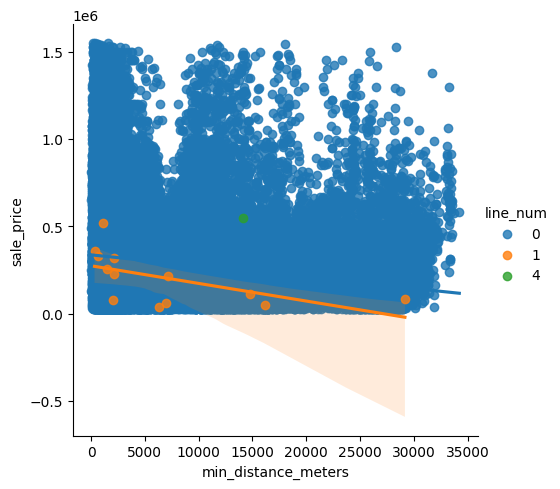

In [18]:
sns.lmplot(x="min_distance_meters", y="sale_price", hue='line_num',data=df_lines)
plt.savefig('../docs/figures/distance_vs_price_by_line_num.png', dpi=300, bbox_inches='tight')
plt.show()

- Weak negative relation in general

3. How do Residense Property Class and Minimum distance to the CTA station influence the sale price? Is there a strong correlation?

`class`, `min_distance_meters`, `sale_price`


In [19]:
df['class'] = df['class'].astype(str) # originally int, change to str
df['class'].unique()

array(['206', '203', '202', '207', '204', '208', '205', '209'],
      dtype=object)

2-02 One-story Residence, any age, up to 999 square feet 

2-03 One-story Residence, any age, 1,000 to 1,800 square feet 

2-04 One-story Residence, any age, 1,801 square feet and over 

2-05 Two-or-more story residence, over 62 years of age up to 2,200 square feet 

2-06 Two-or-more story residence, over 62 years of age, 2,201 to 4,9999 square feet 

2-07 Two-or-more story residence, up to 62 years of age, and up to 2,000 square feet 

2-08 Two-or-more story residence, up to 62 years of age, 3,801 to 4,999 square feet 

2-09 Two-or-more story residence, any age, 5,000 square feet and over 

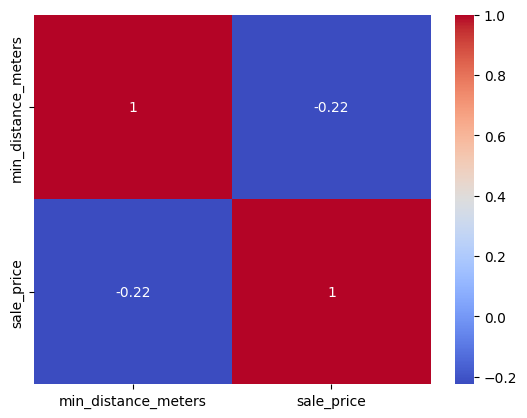

In [20]:
corr = df[['class', 'min_distance_meters', 'sale_price']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('../docs/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

|r| < 0.8, no potential multicollinearity concerns

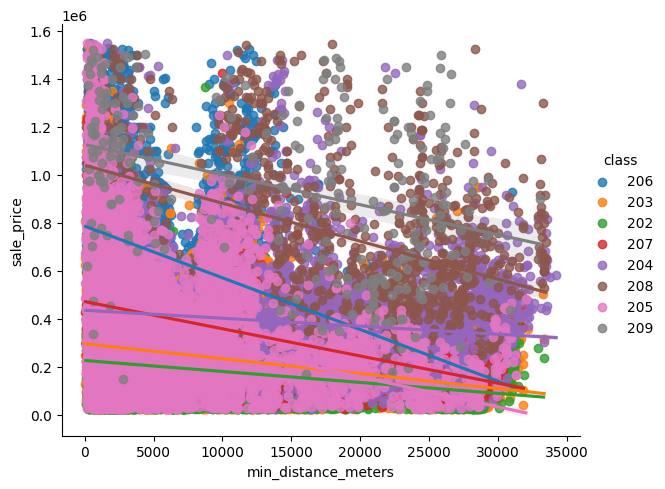

In [21]:
sns.lmplot(
    data=df,
    x='min_distance_meters',
    y='sale_price',
    hue='class', # color by category
    aspect=1.2,
)
plt.savefig('../docs/figures/distance_vs_price_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# use Q("class") to avoid type error
model = smf.ols('sale_price ~ min_distance_meters * Q("class")', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     5029.
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:00:13   Log-Likelihood:            -1.6638e+06
No. Observations:              123817   AIC:                         3.328e+06
Df Residuals:                  123801   BIC:                         3.328e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2.269e+05   1500.889    151.149      0.000    2.24e+05     2.3e+05
Q("class")[T.203]                      6.983e+04   1780.227     39.225      0.000    6.63e+04    7.33e+04
Q("class")[T.204]                      2.093e+05   3355.070     62.390      0.000    2.03e+05    2.16e+05
Q("class")[T.205]                      1.813e+05   2315.547     78.309      0.000    1.77e+05    1.86e+05
Q("class")[T.206]                      5.598e+05   3338.730    167.666      0.000    5.53e+05    5.66e+05
Q("class")[T.207]                      2.456e+05   4449.935     55.191      0.000    2.37e+05    2.54e+05
Q("class")[T.208]                      8.132e+05   1.13e+04     71.843      0.000    7.91e+05    8.35e+05
Q("class")[T.209]                      8.997e+05   1.86e+04     48.470      0.000    8.63e+05    9.36e+05
min_distance_meters                      -4.5736      0.140    -32.712      0.000      -4.848      -4.300
min_distance_meters:Q("class")[T.203]    -1.6493      0.167     -9.877      0.000      -1.977      -1.322
min_distance_meters:Q("class")[T.204]     1.2442      0.250      4.968      0.000       0.753       1.735
min_distance_meters:Q("class")[T.205]    -7.9044      0.302    -26.153      0.000      -8.497      -7.312
min_distance_meters:Q("class")[T.206]   -16.9628      0.470    -36.073      0.000     -17.884     -16.041
min_distance_meters:Q("class")[T.207]    -6.7665      0.335    -20.208      0.000      -7.423      -6.110
min_distance_meters:Q("class")[T.208]   -11.2384      0.578    -19.427      0.000     -12.372     -10.105
min_distance_meters:Q("class")[T.209]    -7.9606      1.050     -7.581      0.000     -10.019      -5.903
==============================================================================
Omnibus:                    31527.466   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153983.849
Skew:                           1.155   Prob(JB):                         0.00
Kurtosis:                       7.951   Cond. No.                     4.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 0.377 R^2 => moderate explanatory level
- F-statistic = 4729, p = 0.000 => statistically significant
- Q("class")[T.xxx] => price higher than the baseline (intercept), all positive, large $$
- `min_distance_meters` => -$4.5805 effect
- `min_distance_meters:Q("class")[T.xxx]` shows how much the slope differs from the baseline.
    - `min_distance_meters:Q("class")[T.206]` steepest
    - `min_distance_meters:Q("class")[T.204]` most flattened